In [9]:
# not preserve Top-k table during stream processing

from Node import DS
from Tools import Config
from CountMinSketch import CountMinSketch
    # ->module             ->class
import time
import os

def main():
    filename='kosarak.dat'
    filepath=r"..\dataset\kosarak"
    gr_file_name='kosarak_ground_truth.csv'
    src_data=os.path.join(filepath,filename)
        # dataset
    gr_path=os.path.join(filepath,gr_file_name)
        # ground truth
        
    w=2688
    d=8
    size=1024
    topk=1024
    Config.Set_default(w,d,size,topk)
    cms=CountMinSketch(Config.width,Config.depth)
    Top_dict=dict()

    #item_count=10000
    start=time.time()
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print('EOF')
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                cms.Add_CMS(item)

    end=time.time()

if __name__ == '__main__':
    main()

EOF
Execution time: 385.313 seconds.
3_estimate:39772
6_estimate:33806
6 3_estimate:24790
11 6_estimate:16474
1_estimate:13355
11 6 3_estimate:12668
1 3_estimate:9676
11_estimate:9075


EOF
Execution time: 135.625 seconds.
Top-1024 in CMS-8*2688
Precision:  0.775
Top_dict with 36968 bytes.
CMS Sketch with 86128 bytes.
Total size 123096 bytes, 
Find:794
Top_ARE: 3.0656
Top_AAE: 233.7670
Estimate time:  0.857 seconds.


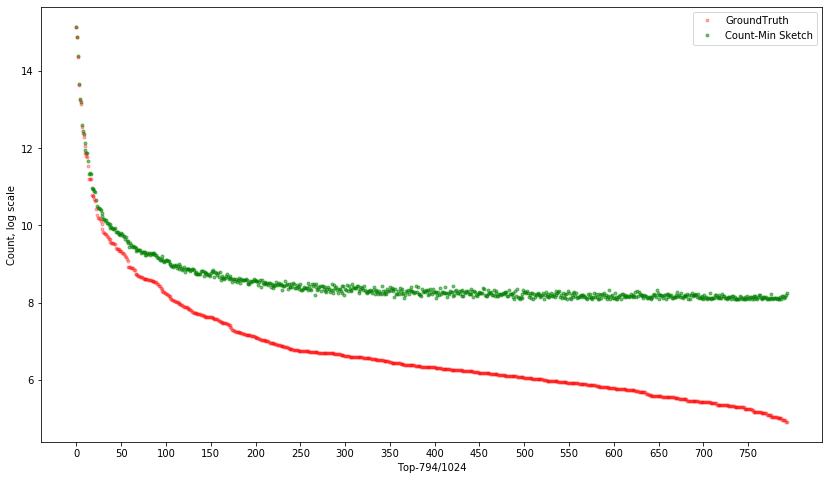

In [1]:
# keep track top-k element during stream processing

from Node import DS
from Tools import Func
from Tools import Config
from CountMinSketch import CountMinSketch
    # ->module             ->class
import time
import os
import sys
import numpy as np
import mmh3

'''
class CountMinSketch():
    def __init__(self,width=None,depth=None):
        """ default initilization function """
        # default values
        self.__width = 0
        self.__depth = 0
        self.__sketch=[]
        if width is not None and depth is not None:
            self.__width = int(width)
            self.__depth = int(depth)
            self.__sketch=np.zeros((self.__depth,self.__width),dtype='int32')
    def __str__(self):
        """ string representation of the count min sketch """
        msg = (
            "Count-Min Sketch:\n"
            "\tWidth: {0}\n"
            "\tDepth: {1}\n"
            "\tSketch: \n{2}\n"
        )
        return msg.format(
            self.__width,
            self.__depth,
            self.__sketch
        )            
    def Add_CMS(self,element):
        # insert element=<ID,count>
        index_li=[0 for _ in range(self.__depth)]
        for row in range(self.__depth):
            col=Func.position(element,row)
            index_li[row]=col
            self.__sketch[row][col]+=1
        return index_li
    @property
    def width(self):
        """int: The width of the count-min sketch

        Note:
            Not settable"""
        return self.__width    
    @property
    def depth(self):
        """int: The depth of the count-min sketch

        Note:
            Not settable"""
        return self.__depth

    @property
    def sketch(self):
        """whole sketch array of the count-min sketch

        Note:
            Not settable"""
        return self.__sketch
    
    def Estimate_CMS(self,element):
        countlist=[]
        for row in range(self.__depth):
            col=Func.position(element,row)
            countlist.append(self.__sketch[row][col])    
        return min(countlist)


'''

filename='kosarak.dat'
filepath=r"..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth
    
    
w=2688
d=8
size=1024
topk=1024
Config.Set_default(w,d,size,topk)
cms=CountMinSketch(Config.width,Config.depth)
Top_dict=dict()

#item_count=30
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
            count=cms.Estimate_CMS(item)
            if len(Top_dict)<Config.size:
                Top_dict[item.ID]=count
            else:
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]=count
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    if count >Top_dict[min_ele]:
                        Top_dict[item.ID]=count
                        Top_dict.pop(min_ele)

end=time.time()
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
# keep tracking top-1024 all the time
tp_set,precision=Func.Get_precision(gr_path,Top_dict,Config.topk)
print("Top-{} in CMS-{}*{}".format(Config.topk,Config.depth,Config.width))
print("Precision: {:6.3f}".format(precision))

# Count-Precision
# compare estimation count with ground truth.

# memory usage
print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("CMS Sketch with {} bytes.".format(sys.getsizeof(cms.sketch)))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(cms.sketch)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=Func.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

Func.Plot_topk_compare(gr_path,Top_dict)

In [ ]:
w=192
d=112
size=1024
topk=1024
Config.Set_default(w,d,size,topk)
cms=CountMinSketch(Config.width,Config.depth)
Top_dict=dict()

#item_count=30
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            cms.Add_CMS(item)
end=time.time()
estimate_list=["3","6","6 3","11 6","1","11 6 3","1 3","11"]
for i in estimate_list:
    x=DS.Tail(i,1)
    print("{}_estimate:{}".format(x.ID,cms.Estimate_CMS(x)))
